In [2]:
#스토캐스틱 지표 활용 > https://skyeong.net/287 참고
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

df = yf.download('tsla', start="2020-01-01", end="2020-12-31")
df['Date'] = df.index
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,2020-01-02
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,2020-01-03
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,2020-01-06
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,2020-01-07
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,2020-01-08


In [3]:
# 일자(n,m,t)에 따른 스토캐스틱의 값을 구하기 위해 함수형태로 만듬
def Stochastic(df, n = 14, m = 5, t = 5):
    #입력받은 값이 dataframe이라는 것을 정의해줌
    df = pd.DataFrame(df)
    #n일중 최고가
    ndays_high = df.High.rolling(window = n, min_periods = 1).max()
    #n일중 최저가
    ndays_low = df.Low.rolling(window = n, min_periods = 1).min()
    #Fast%K 계산
    fast_k = ((df.Close - ndays_low) / (ndays_high - ndays_low)) * 100
    #Fast%D & Slow%K(둘이 같음) 계산
    slow_k = fast_k.ewm(span = m).mean()
    #Slow%D 계산
    slow_d = slow_k.ewm(span = t).mean()

    #df에 컬럼 추가
    df = df.assign(fast_k = fast_k, fast_d = slow_k, slow_k = slow_k, slow_d = slow_d)

    return df

# 단순 이동 평균(Simple Moving Average, SMA)
def SMA(data, period = 30, column = 'Close'):
    return data[column].rolling(window=period).mean()
# 상대적 강도 지수(RSI) 계산 함수
def RSI(data, period = 14, column = 'Close'):
    delta = data[column].diff(1) #
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up<0] = 0
    down[down > 0] = 0
    data['up'] = up
    data['down'] = down

    AVG_Gain = SMA(data, period, column = 'up')
    AVG_Loss = abs(SMA(data, period, column = 'down'))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0/(1.0 + RS))

    data['RSI'] = RSI
    return data

In [4]:
df = Stochastic(df, 14, 5, 5)
df = RSI(df, 14)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Date,fast_k,fast_d,slow_k,slow_d,up,down,RSI
Date,,,,,,,,,,,,,,
2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000,2020-12-23,61.899559,70.605470,70.605470,77.991628,1.879990,0.0,58.193143
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,2020-12-24,74.172220,71.794387,71.794387,75.925881,5.263336,0.0,59.472111
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,2020-12-28,75.664524,73.084433,73.084433,74.978732,0.639999,0.0,53.776735
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,2020-12-29,77.452207,74.540357,74.540357,74.832607,0.766678,0.0,52.831188
2020-12-30,224.000000,232.199997,222.786667,231.593338,231.593338,128538000,2020-12-30,98.602812,82.561176,82.561176,77.408796,9.596664,0.0,66.853303


Text(0, 0.5, 'USD($)')

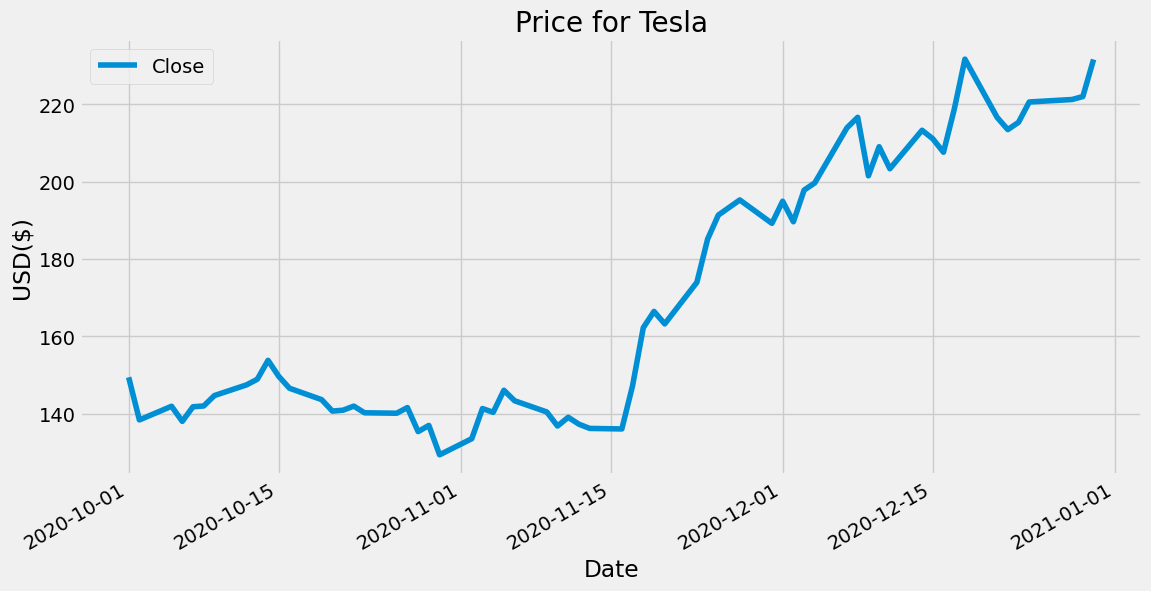

In [7]:
#시각화
column_list = ['Close']

cut = df.Date>='2020-10-01'
df[column_list].loc[cut,:].plot(figsize=(12.2,6.4))
plt.title('Price for Tesla')
plt.ylabel('USD($)')

Text(0, 0.5, 'Percent')

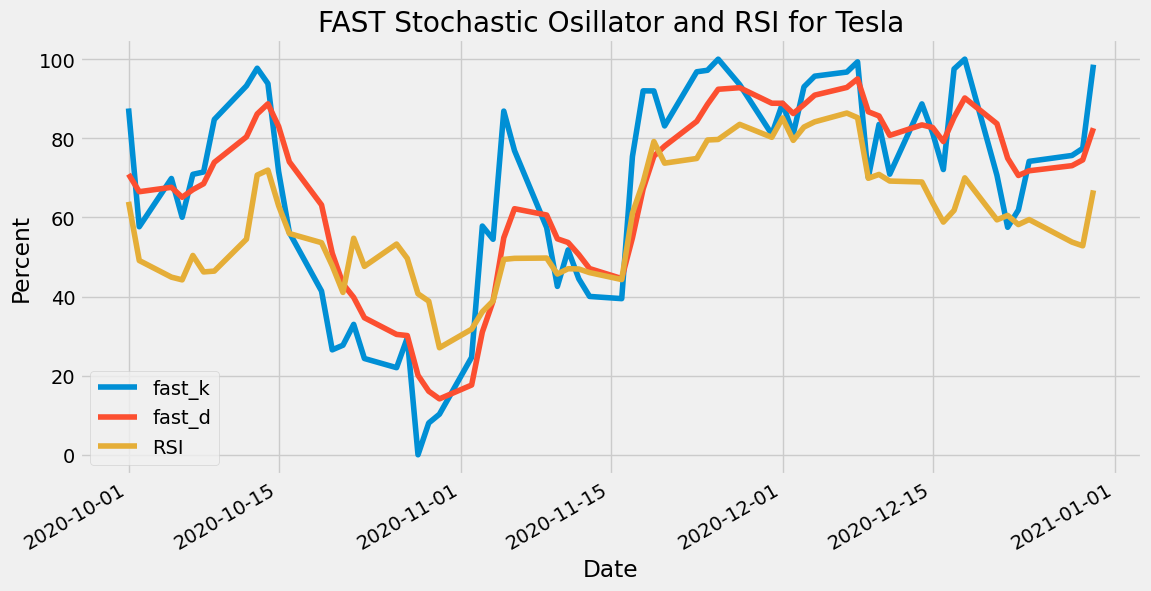

In [9]:
#스토캐스틱 FAST와 RSI 시각화
column_list = ['fast_k','fast_d','RSI']

cut = df.Date>='2020-10-01'
df[column_list].loc[cut,:].plot(figsize=(12.2,6.4))
plt.title('FAST Stochastic Osillator and RSI for Tesla')
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

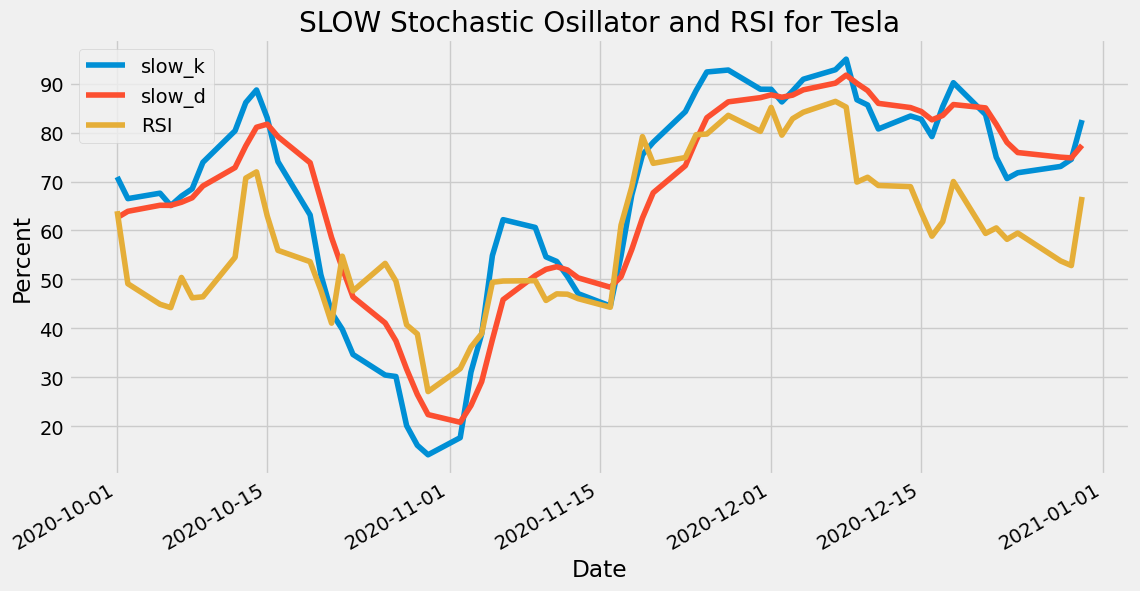

In [10]:
#스토캐스틱 SLOW와 RSI 시각화
column_list = ['slow_k','slow_d','RSI']

cut = df.Date>='2020-10-01'
df[column_list].loc[cut,:].plot(figsize=(12.2,6.4))
plt.title('SLOW Stochastic Osillator and RSI for Tesla')
plt.ylabel('Percent')